https://en.wikipedia.org/wiki/Cluster_analysis


https://en.wikipedia.org/wiki/Recommender_system

https://datascience.stackexchange.com/questions/118812/best-algorithms-for-clustering-customers-customer-segmentation

https://link.springer.com/article/10.1007/s44196-024-00568-8

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
Hierarchical

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html#sklearn.cluster.HDBSCAN Heirarchical dbscan

https://stats.stackexchange.com/questions/187595/clustering-with-categorical-and-numeric-data

In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import HDBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import matplotlib.colors as mcolors

from scipy.stats import chi2_contingency, f_oneway
from sklearn.feature_selection import f_classif

In [2]:
# load dataset
data = pd.read_csv("cvd_adj.csv")

In [3]:
def create_trainset(df,fract):
    X = df
    randomstate = 42
    numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 
                     'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
    
    standardscaler = StandardScaler()
    X_scaled = standardscaler.fit_transform(X[numerical_columns])
    categorical_columns = X.drop(numerical_columns, axis=1)
    full_data = np.hstack([X_scaled, categorical_columns.to_numpy()])
    
    col = list(X.columns.values)
    
    df_fulldata = pd.DataFrame(columns=col,data = full_data)
    sampled_data = df_fulldata.sample(frac=fract, random_state=randomstate)
    
    return sampled_data

In [69]:
X = create_trainset(data,0.20)

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15443 entries, 302051 to 241618
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Height_(cm)                                          15443 non-null  float64
 1   Weight_(kg)                                          15443 non-null  float64
 2   BMI                                                  15443 non-null  float64
 3   Alcohol_Consumption                                  15443 non-null  float64
 4   Fruit_Consumption                                    15443 non-null  float64
 5   Green_Vegetables_Consumption                         15443 non-null  float64
 6   FriedPotato_Consumption                              15443 non-null  float64
 7   General_Health_Fair                                  15443 non-null  float64
 8   General_Health_Good                                  15443 non-nu

In [59]:
tempdata = data.sample(frac=1, random_state=42)
#hela datasetet

In [95]:
hdb = HDBSCAN(min_cluster_size=5, n_jobs=-1)
hdb.fit_predict(tempdata)

array([48, 48, 48, ..., 48, 48, 48])

In [90]:
hdb.get_params()

{'algorithm': 'auto',
 'allow_single_cluster': False,
 'alpha': 1.0,
 'cluster_selection_epsilon': 0.0,
 'cluster_selection_method': 'eom',
 'copy': False,
 'leaf_size': 40,
 'max_cluster_size': None,
 'metric': 'euclidean',
 'metric_params': None,
 'min_cluster_size': 5,
 'min_samples': None,
 'n_jobs': -1,
 'store_centers': None}

In [99]:
labels = hdb.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 52
Estimated number of noise points: 2178


In [98]:
labels = hdb.labels_

In [ ]:
score = silhouette_score(tempdata, labels)

For n_clusters = 52 The average silhouette_score is : 0.27489414220778463


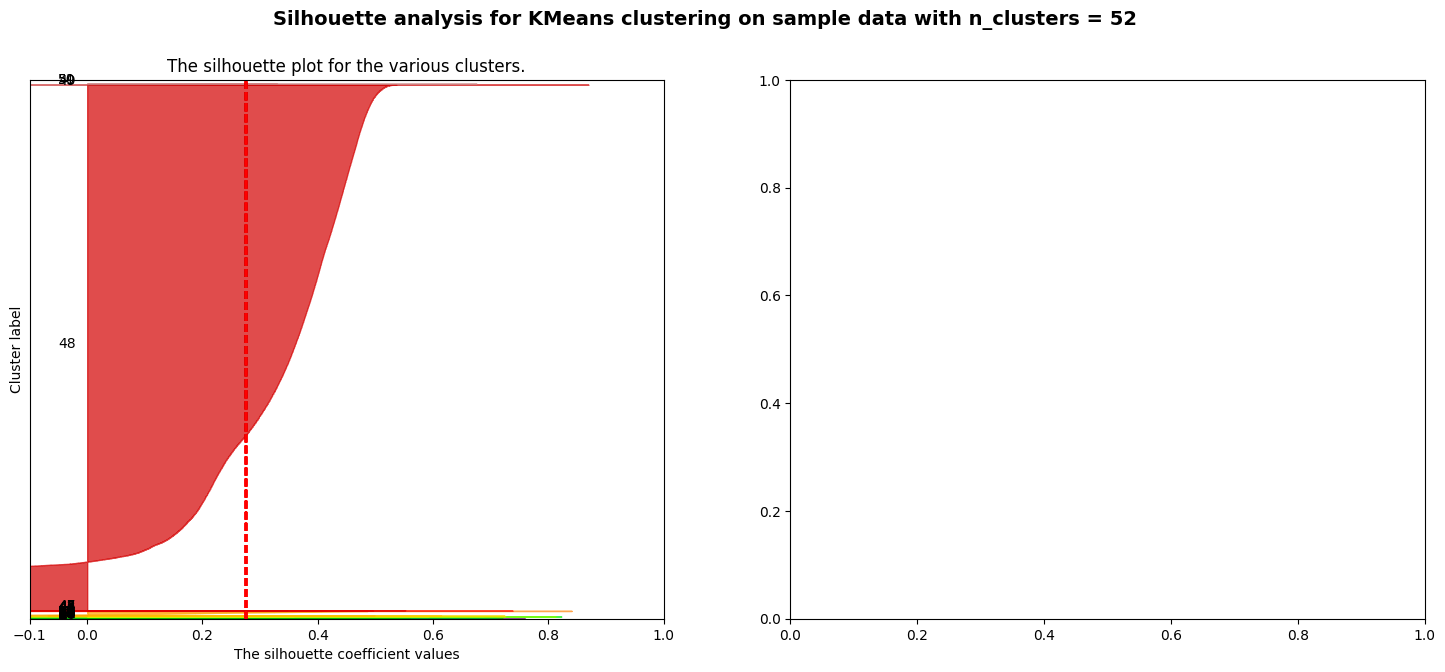

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(tempdata) + (n_clusters_ + 1) * 10])

silhouette_avg = silhouette_score(tempdata, labels)
print(
        "For n_clusters =",
        n_clusters_,
        "The average silhouette_score is :",
        silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(tempdata, labels)

y_lower = 10

for i in range(n_clusters_):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters_)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters_,
        fontsize=14,
        fontweight="bold",
    )

In [104]:
joblib.dump(hdb,"hdb_model.pkl",compress=3)

['hdb_model.pkl']

In [107]:
labels

array([48, 48, 48, ..., 48, 48, 48])

In [120]:
pd.set_option('display.max_columns', 500)

In [108]:
clustered_data = pd.DataFrame(tempdata)

In [110]:
clustered_data["Cluster"] = labels

In [116]:
clustered_data["Cluster"].value_counts()

Cluster
 48    301591
 41      2542
-1       2178
 50       650
 37       293
 27       225
 46       209
 34       173
 10       103
 28       103
 43       102
 24        61
 20        51
 16        51
 21        39
 26        34
 12        30
 45        30
 40        28
 18        23
 9         21
 5         19
 23        19
 11        18
 36        18
 1         17
 51        15
 3         14
 49        14
 29        13
 47        13
 19        12
 39        12
 15        11
 4         10
 7         10
 38         9
 0          7
 44         7
 31         7
 32         7
 42         6
 33         6
 14         6
 30         6
 17         6
 25         5
 6          5
 2          5
 35         5
 22         5
 8          5
 13         5
Name: count, dtype: int64

In [121]:
clustered_data.groupby("Cluster").describe()

Height_(cm)                                                       \
              count        mean        std    min     25%    50%     75%   
Cluster                                                                    
-1           2178.0  172.138659  20.083886   91.0  160.00  173.0  185.00   
 0              7.0  174.571429   5.623082  168.0  170.50  175.0  177.50   
 1             17.0  172.294118  14.584944  152.0  160.00  173.0  180.00   
 2              5.0  169.800000   3.033150  168.0  168.00  168.0  170.00   
 3             14.0  170.642857  14.637187  152.0  155.50  174.0  180.00   
 4             10.0  175.100000   8.774331  160.0  175.00  176.5  179.50   
 5             19.0  175.473684  10.611149  157.0  170.00  180.0  181.50   
 6              5.0  163.000000   4.415880  157.0  160.00  165.0  165.00   
 7             10.0  173.800000  10.271860  160.0  165.00  174.0  183.00   
 8              5.0  188.000000   6.041523  180.0  185.00  188.0  191.00   
 9             21.0  174.809524   7.665631  157.0  170.00  175.0  180.00   
 10           103.0  174.165049   8.832979  155.0  168.00  175.0  180.00   
 11            18.0  171.111111   8.764158  155.0  165.00  173.0  178.75   
 12            30.0  163.066667   9.776585  150.0  155.00  160.0  169.50   
 13             5.0  153.800000   3.898718  147.0  155.00  155.0  155.00   
 14             6.0  164.666667   4.501851  157.0  163.50  165.0  167.25   
 15            11.0  174.636364   7.658626  163.0  168.00  175.0  181.50   
 16            51.0  165.509804   6.643410  155.0  160.00  165.0  170.00   
 17             6.0  174.000000   2.683282  170.0  173.00  174.0  175.00   
 18            23.0  171.608696  11.761799  147.0  161.50  175.0  180.00   
 19            12.0  161.416667   6.501165  152.0  158.75  160.0  165.00   
 20            51.0  170.764706   9.947036  152.0  164.00  170.0  176.50   
 21            39.0  171.179487   9.588567  157.0  163.00  173.0  180.00   
 22             5.0  180.200000   3.962323  175.0  178.00  180.0  183.00   
 23            19.0  172.789474  11.683697  152.0  163.00  175.0  182.50   
 24            61.0  168.262295   9.870666  150.0  160.00  170.0  175.00   
 25             5.0  166.200000   6.870226  157.0  163.00  165.0  173.00   
 26            34.0  166.794118   7.846170  155.0  160.00  168.0  173.00   
 27           225.0  171.595556   9.802103  147.0  165.00  173.0  178.00   
 28           103.0  169.242718  10.255048  145.0  163.00  170.0  175.00   
 29            13.0  164.615385   7.041999  157.0  157.00  163.0  170.00   
 30             6.0  184.500000   4.183300  178.0  183.50  185.0  185.00   
 31             7.0  180.000000   3.651484  173.0  179.00  180.0  183.00   
 32             7.0  167.285714   3.683942  160.0  166.50  168.0  170.00   
 33             6.0  178.000000   3.464102  175.0  175.00  177.5  180.00   
 34           173.0  167.791908   8.162773  150.0  163.00  168.0  173.00   
 35             5.0  163.800000   2.949576  160.0  163.00  163.0  165.00   
 36            18.0  165.500000   3.451342  160.0  163.00  165.0  168.00   
 37           293.0  168.593857   9.187668  150.0  163.00  168.0  175.00   
 38             9.0  172.333333   5.408327  163.0  170.00  175.0  175.00   
 39            12.0  170.333333   8.689945  160.0  162.25  169.0  178.00   
 40            28.0  171.250000   9.102808  150.0  167.25  173.0  178.00   
 41          2542.0  169.864673  10.043852  140.0  163.00  170.0  178.00   
 42             6.0  171.666667   2.943920  168.0  169.25  173.0  173.00   
 43           102.0  169.852941  10.545889  152.0  163.00  170.0  178.00   
 44             7.0  162.428571   4.391550  157.0  158.50  165.0  165.00   
 45            30.0  169.466667   5.757953  160.0  165.00  169.0  174.50   
 46           209.0  169.133971   9.577681  147.0  163.00  170.0  175.00   
 47            13.0  167.846154   5.814438  160.0  163.00  170.0  173.00   
 48        301591.0  170.622174  10.562761  115.0  163.0

In [71]:
categorical_columns = data.select_dtypes(include=['bool']).columns.tolist()

In [72]:
categorical_columns

['General_Health_Fair',
 'General_Health_Good',
 'General_Health_Poor',
 'General_Health_Very Good',
 'Checkup_5 or more years ago',
 'Checkup_Within the past 2 years',
 'Checkup_Within the past 5 years',
 'Checkup_Within the past year',
 'Exercise_Yes',
 'Heart_Disease_Yes',
 'Skin_Cancer_Yes',
 'Other_Cancer_Yes',
 'Depression_Yes',
 'Diabetes_No, pre-diabetes or borderline diabetes',
 'Diabetes_Yes',
 'Diabetes_Yes, but female told only during pregnancy',
 'Arthritis_Yes',
 'Sex_Male',
 'Age_Category_25-29',
 'Age_Category_30-34',
 'Age_Category_35-39',
 'Age_Category_40-44',
 'Age_Category_45-49',
 'Age_Category_50-54',
 'Age_Category_55-59',
 'Age_Category_60-64',
 'Age_Category_65-69',
 'Age_Category_70-74',
 'Age_Category_75-79',
 'Age_Category_80+',
 'Smoking_History_Yes']

In [128]:
#range_n_clusters = [3,4,5,6,7,8,9]
#range_n_clusters = [3,4]
range_n_clusters = [3,5,10,15,20,30,35]

models = []

In [126]:
tempdata = data.sample(frac=1, random_state=42)

In [127]:
tempdata

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
302051,178.0,86.18,27.26,12.0,30.0,16.0,8.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False
59950,165.0,79.38,29.12,0.0,60.0,60.0,12.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
203639,168.0,72.57,25.82,6.0,0.0,20.0,0.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
78768,183.0,93.89,28.07,0.0,60.0,8.0,2.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True
216156,160.0,54.43,21.26,0.0,20.0,6.0,15.0,True,False,False,False,False,False,False,True,True,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124115,185.0,89.81,26.12,0.0,24.0,0.0,4.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
226195,160.0,61.23,23.91,0.0,12.0,4.0,8.0,False,True,False,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
222460,165.0,102.06,37.44,0.0,12.0,4.0,1.0,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
19950,188.0,83.91,23.75,20.0,20.0,4.0,4.0,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True


For n_clusters = 3 The average silhouette_score is : 0.2769182591082346
For n_clusters = 5 The average silhouette_score is : 0.2208308643951698
For n_clusters = 10 The average silhouette_score is : 0.18149435115046322
For n_clusters = 15 The average silhouette_score is : 0.1834377502305454
For n_clusters = 20 The average silhouette_score is : 0.1835651476442208
For n_clusters = 30 The average silhouette_score is : 0.1752718017320101
For n_clusters = 35 The average silhouette_score is : 0.17684896213521592


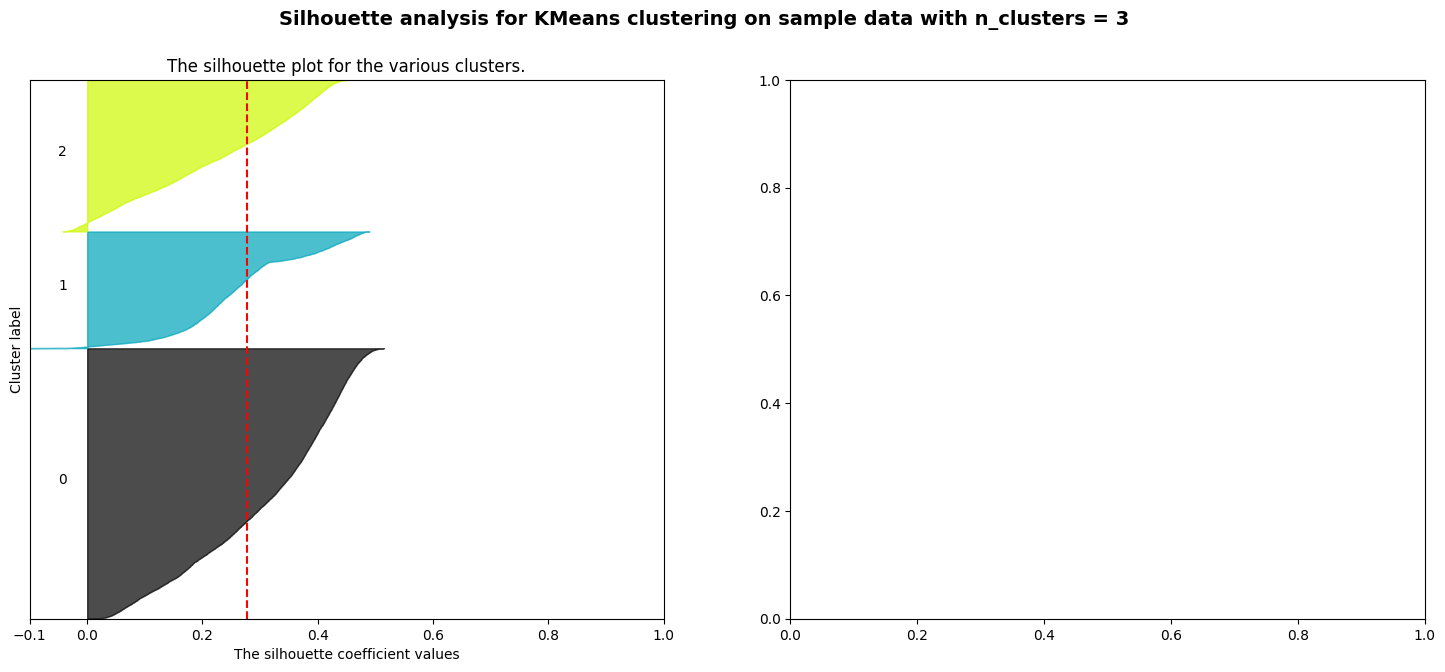

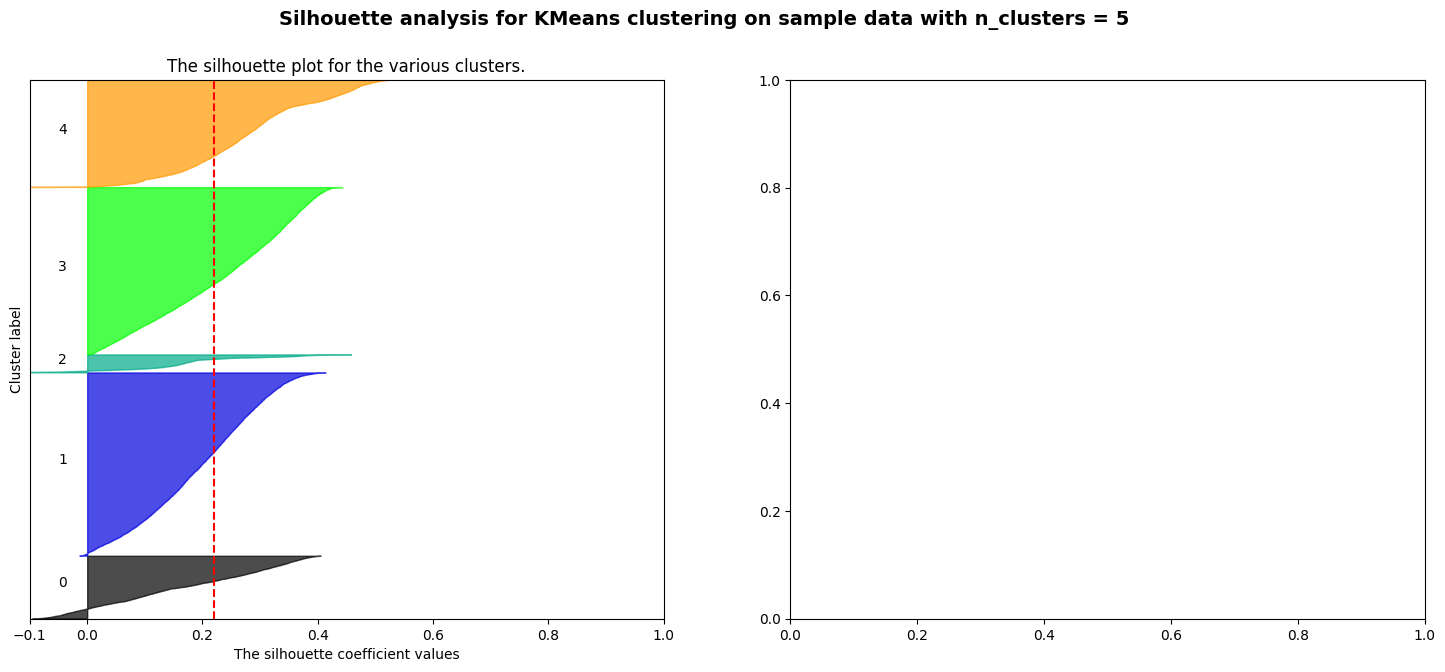

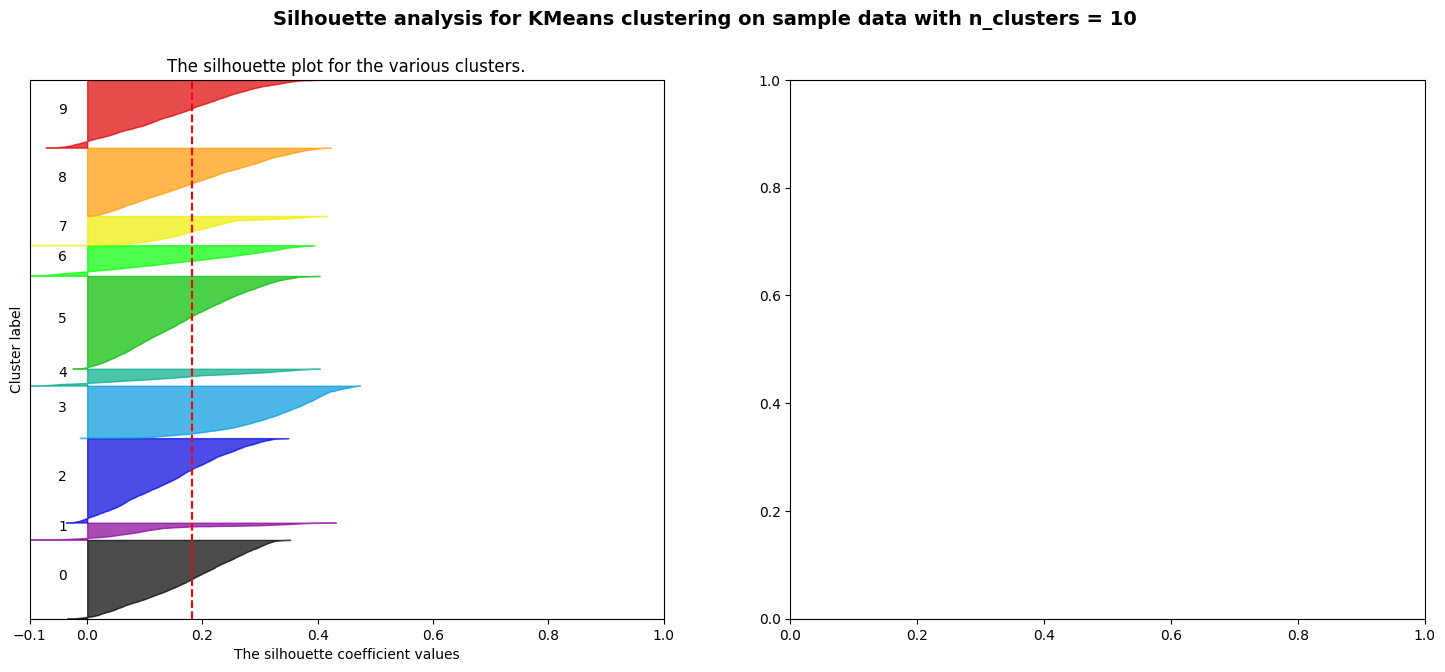

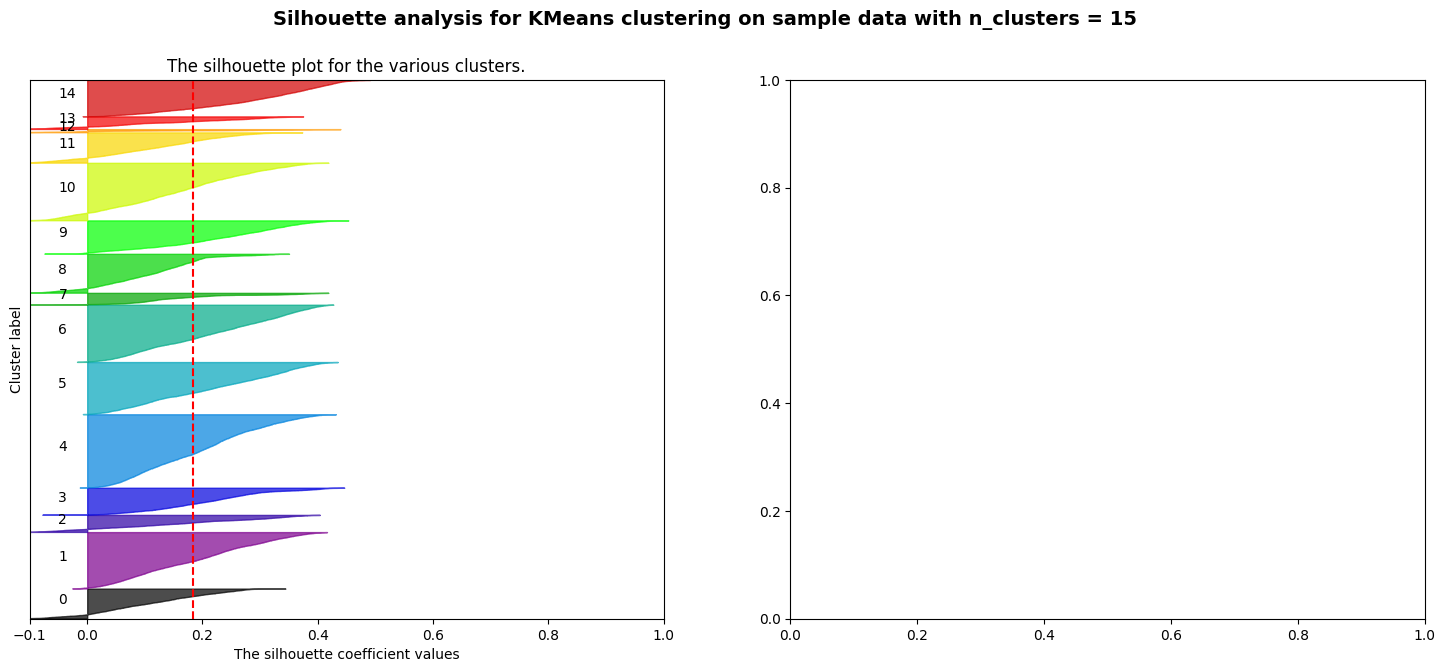

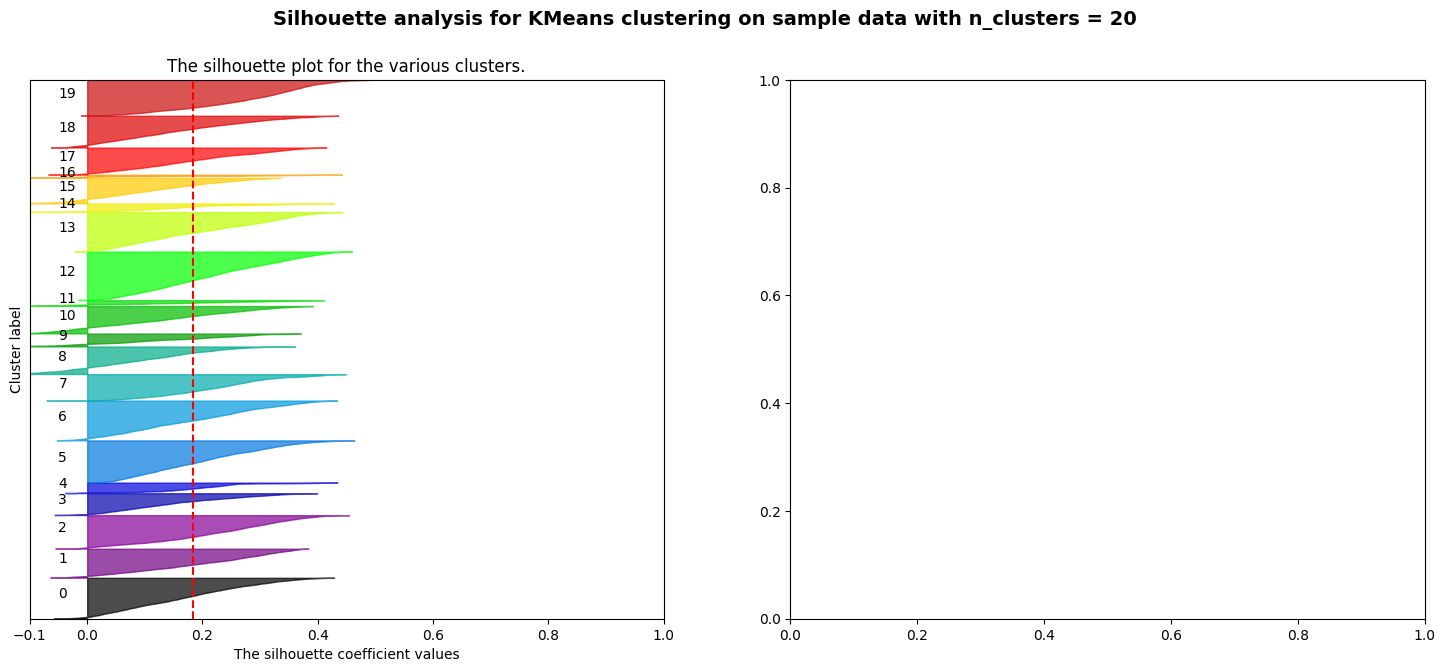

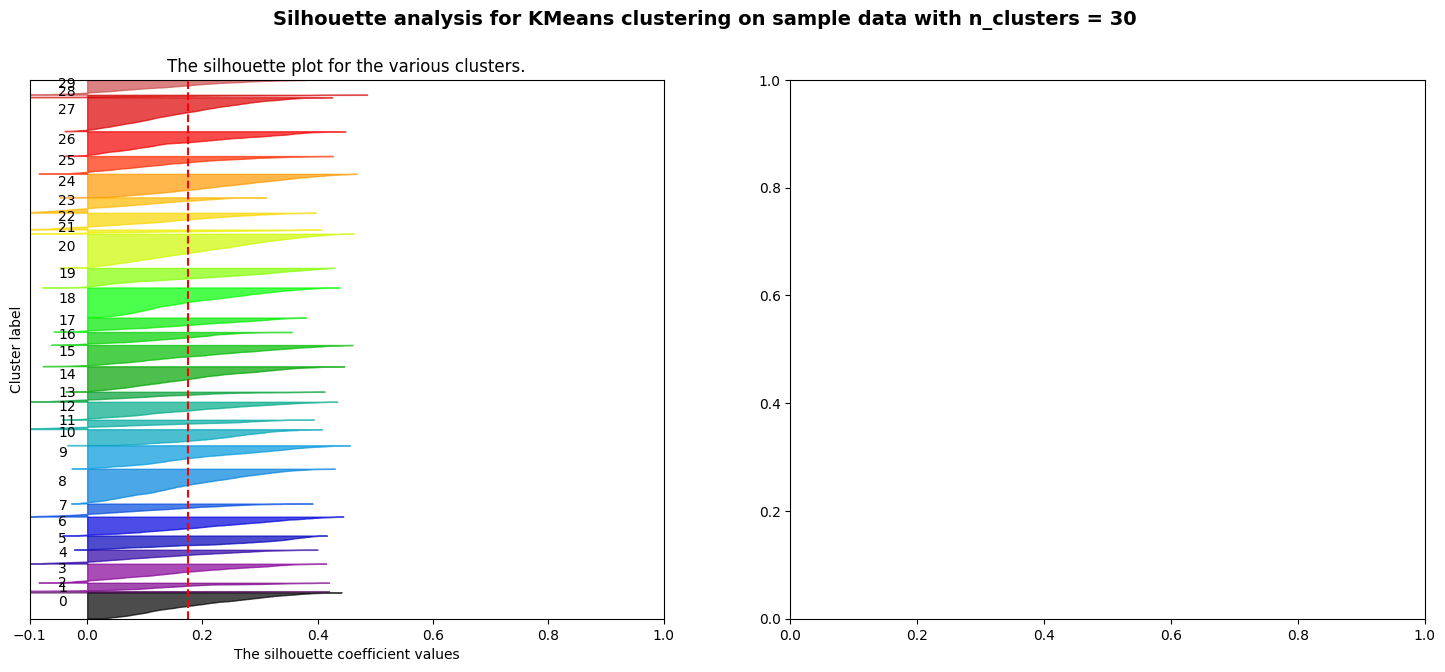

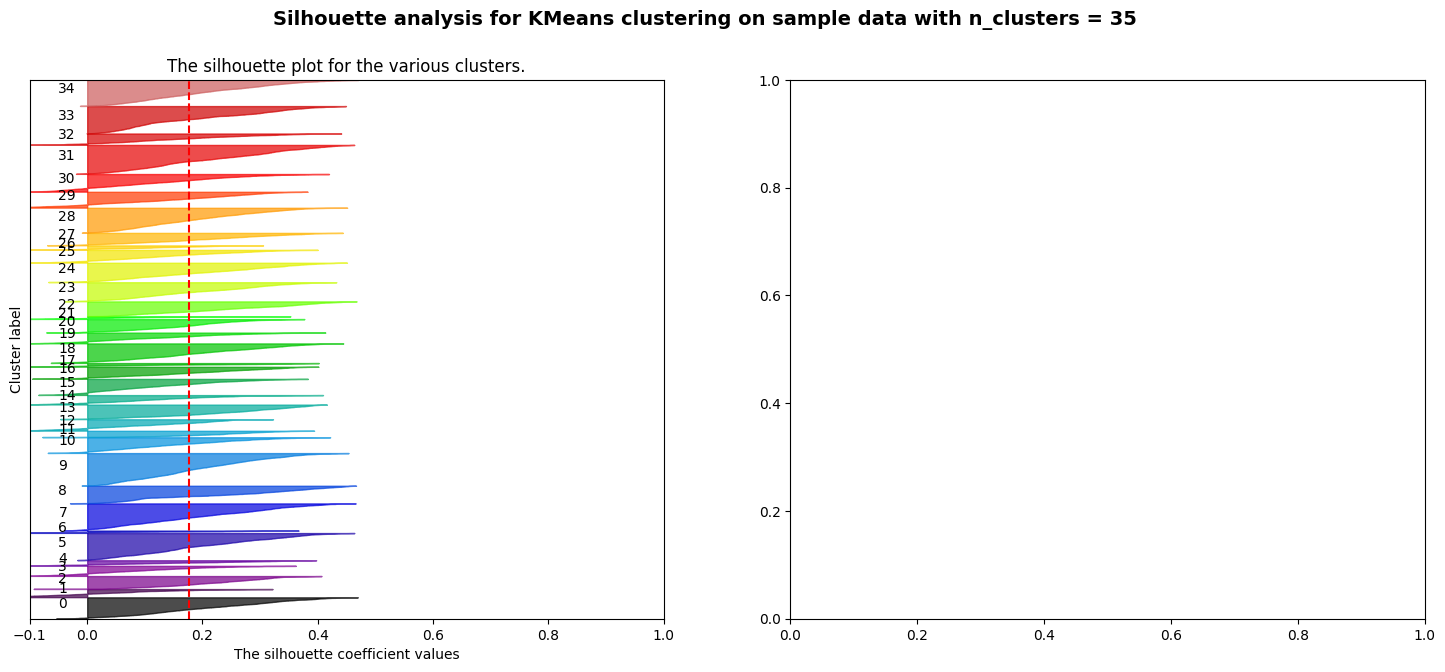

In [129]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(tempdata) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KPrototypes(n_clusters = n_clusters, n_jobs = -1)
    cluster_labels = clusterer.fit_predict(tempdata, categorical = [X.columns.get_loc(col) for col in categorical_columns])

    models.append(clusterer)   
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tempdata, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tempdata, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [143]:

tempdata = data.sample(frac=0.2, random_state=42)

In [144]:
kmeans_models = []

For n_clusters = 3 The average silhouette_score is : 0.27699580322574346
For n_clusters = 5 The average silhouette_score is : 0.21099817982011765
For n_clusters = 10 The average silhouette_score is : 0.18337665687450286
For n_clusters = 15 The average silhouette_score is : 0.17705338532882556
For n_clusters = 20 The average silhouette_score is : 0.17377864699201212
For n_clusters = 30 The average silhouette_score is : 0.17147126751861097
For n_clusters = 35 The average silhouette_score is : 0.18057332208576723


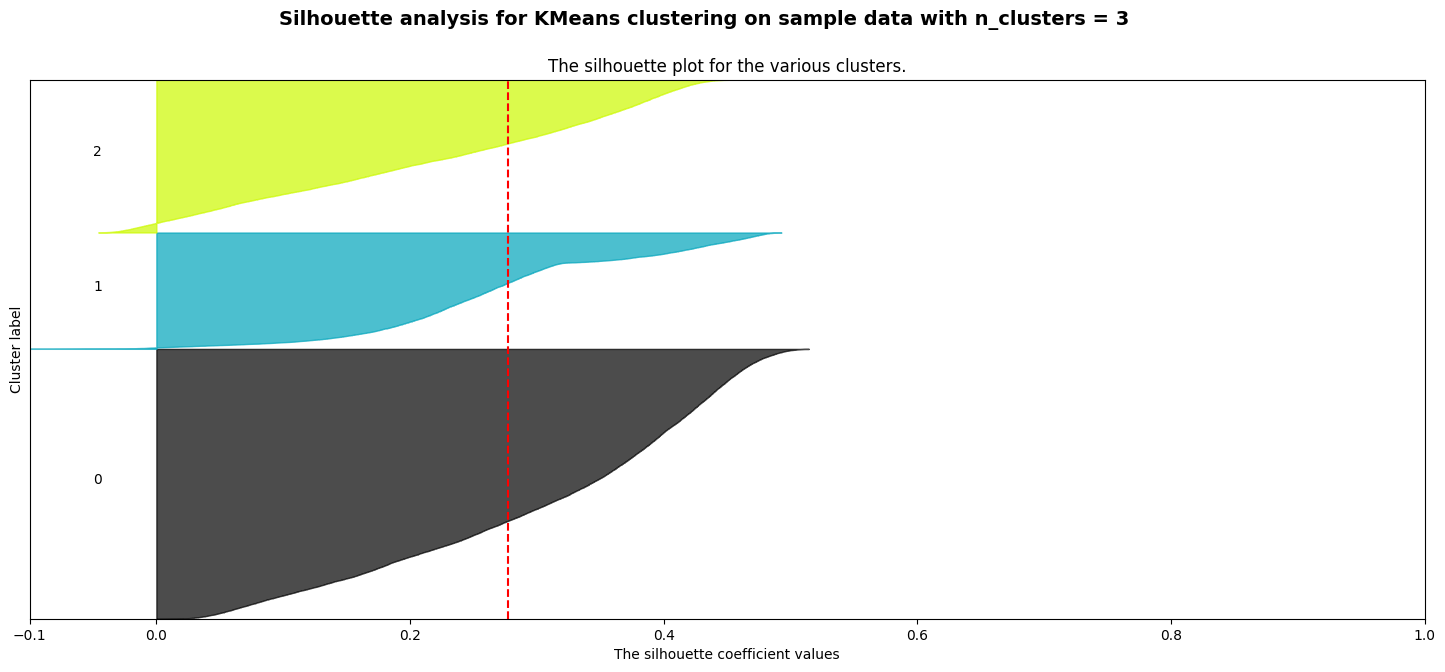

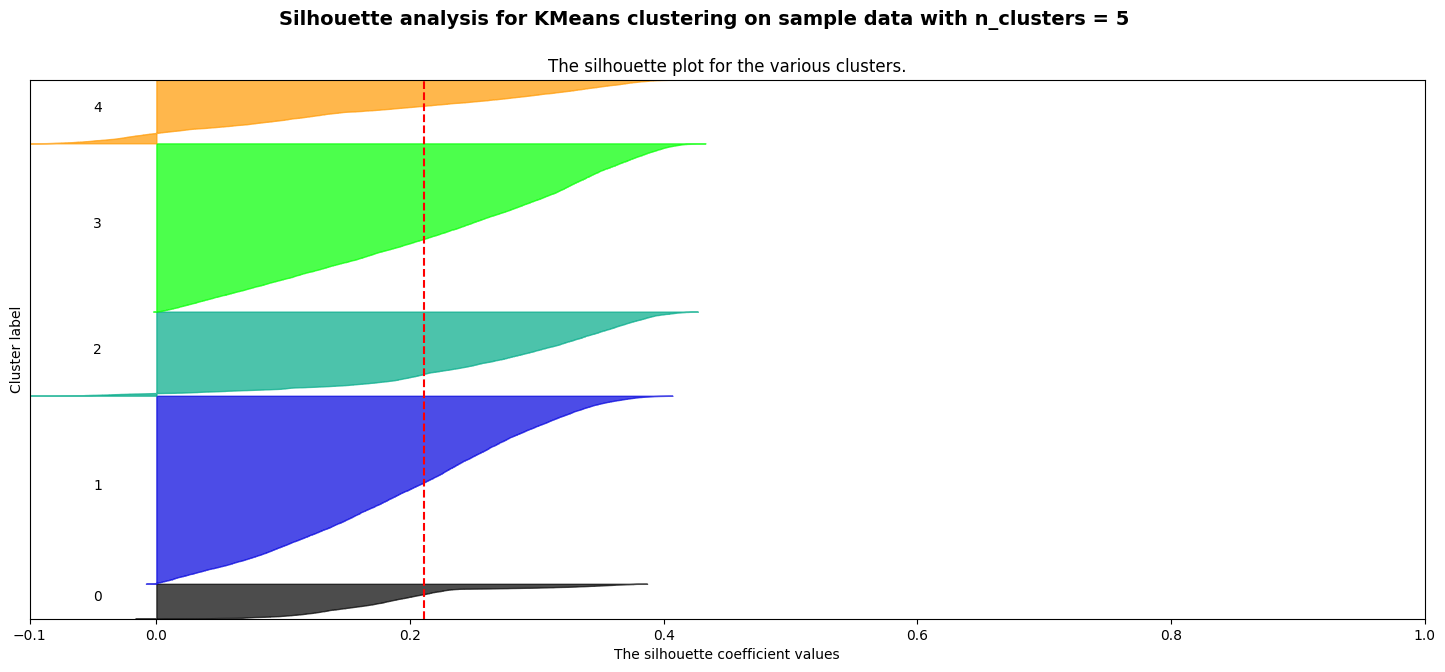

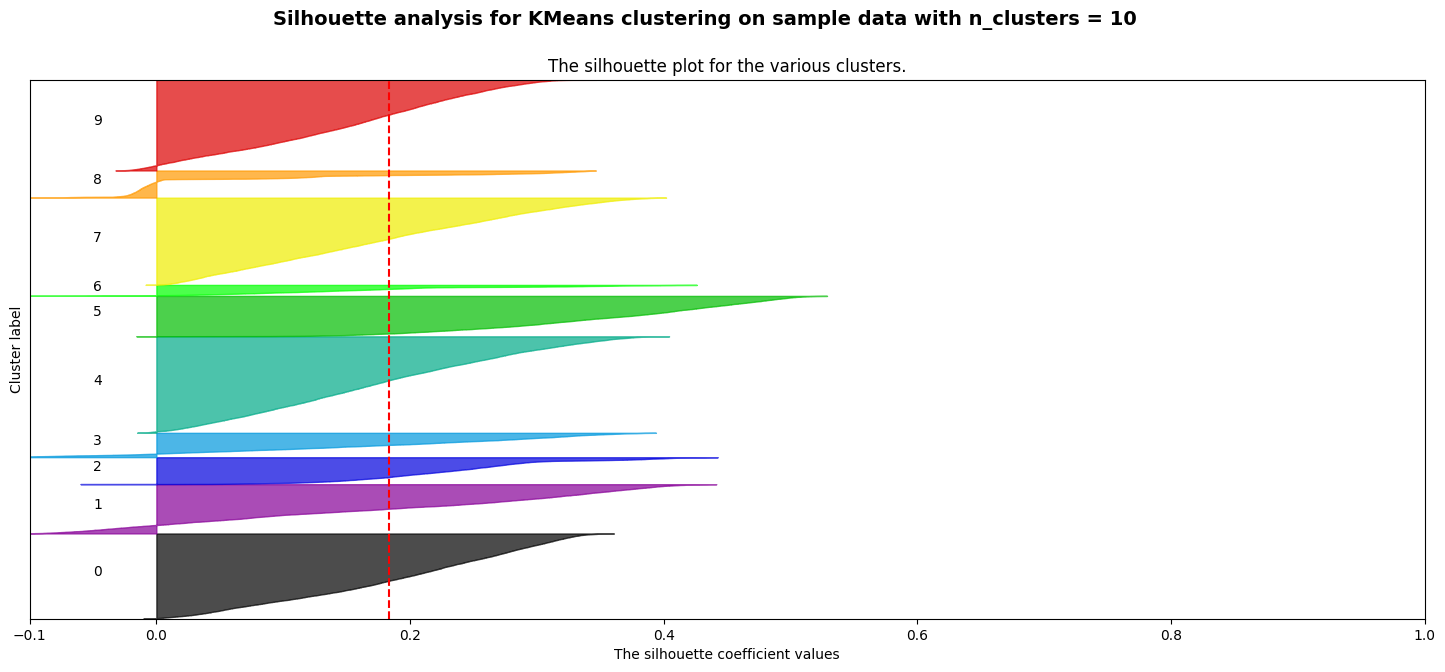

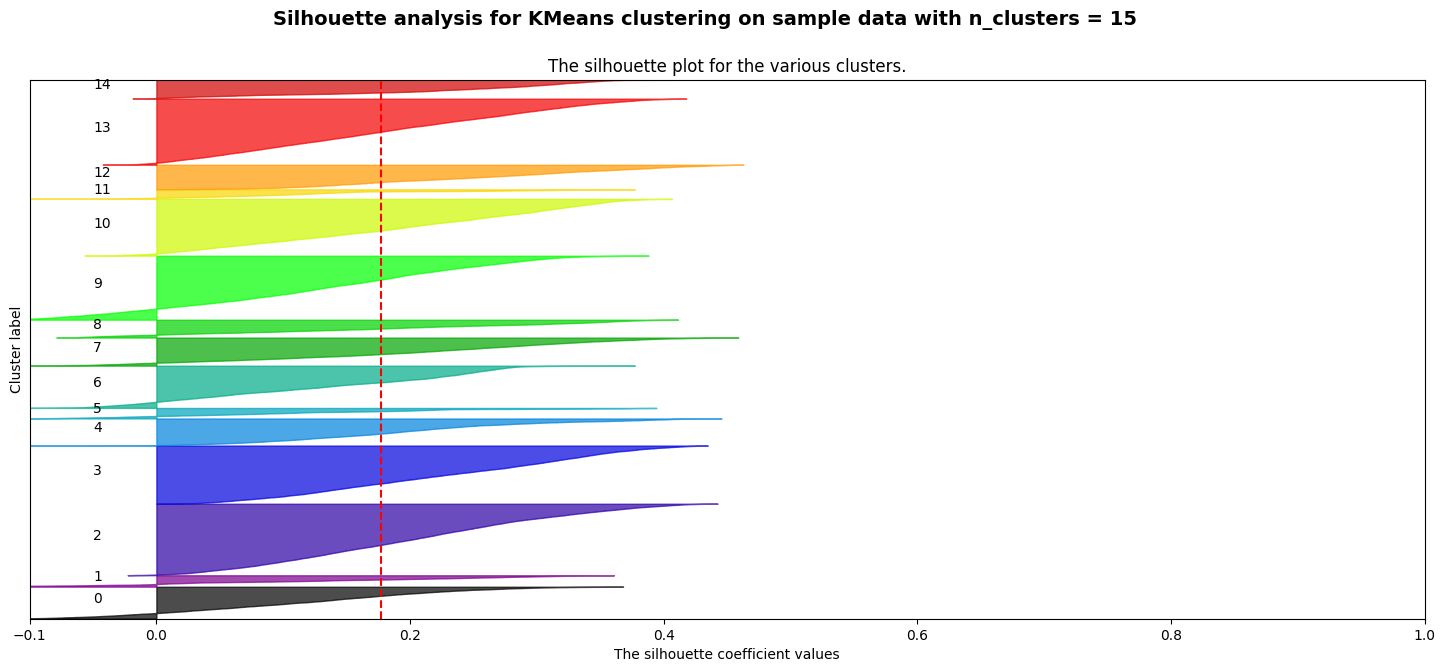

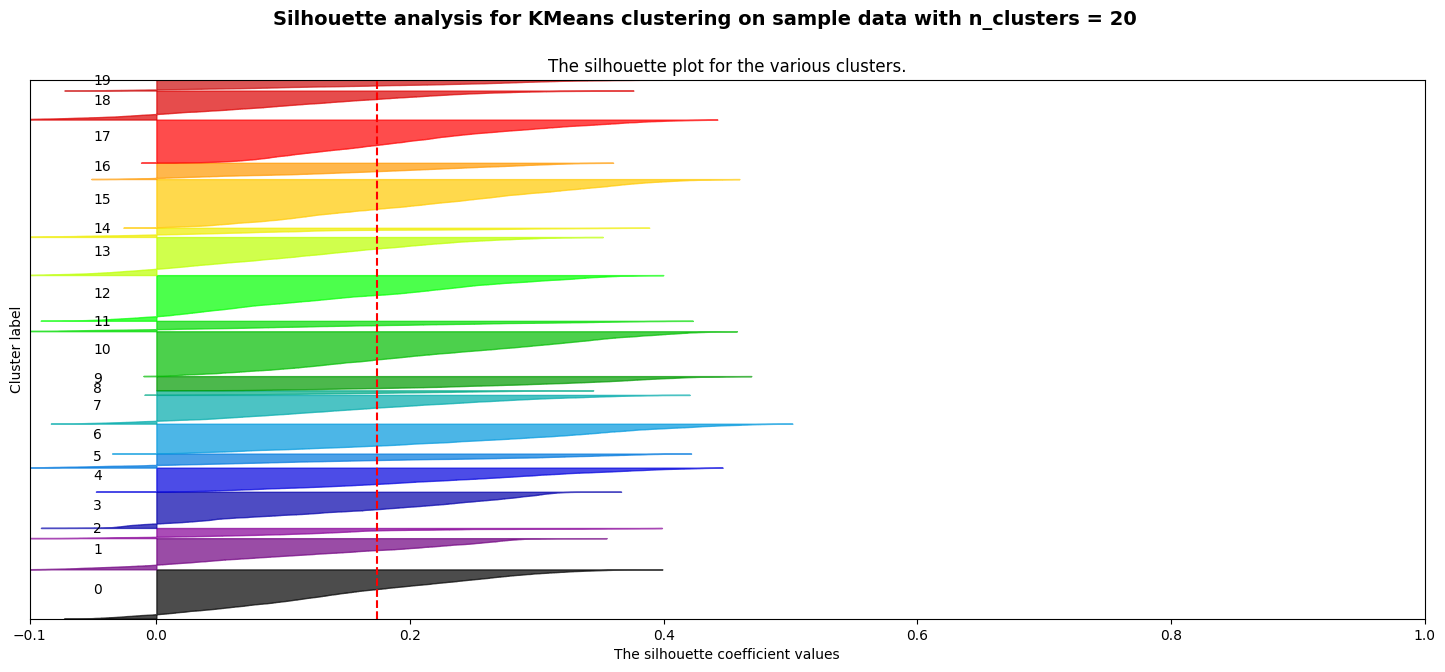

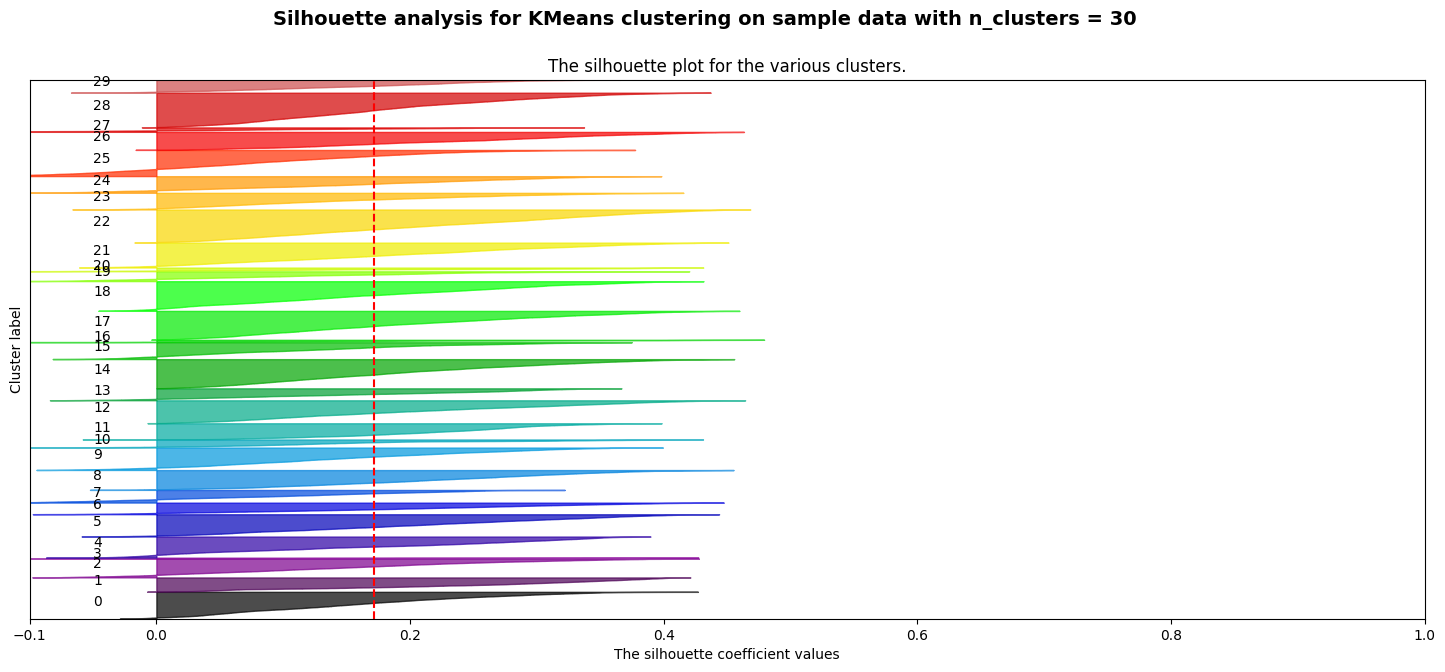

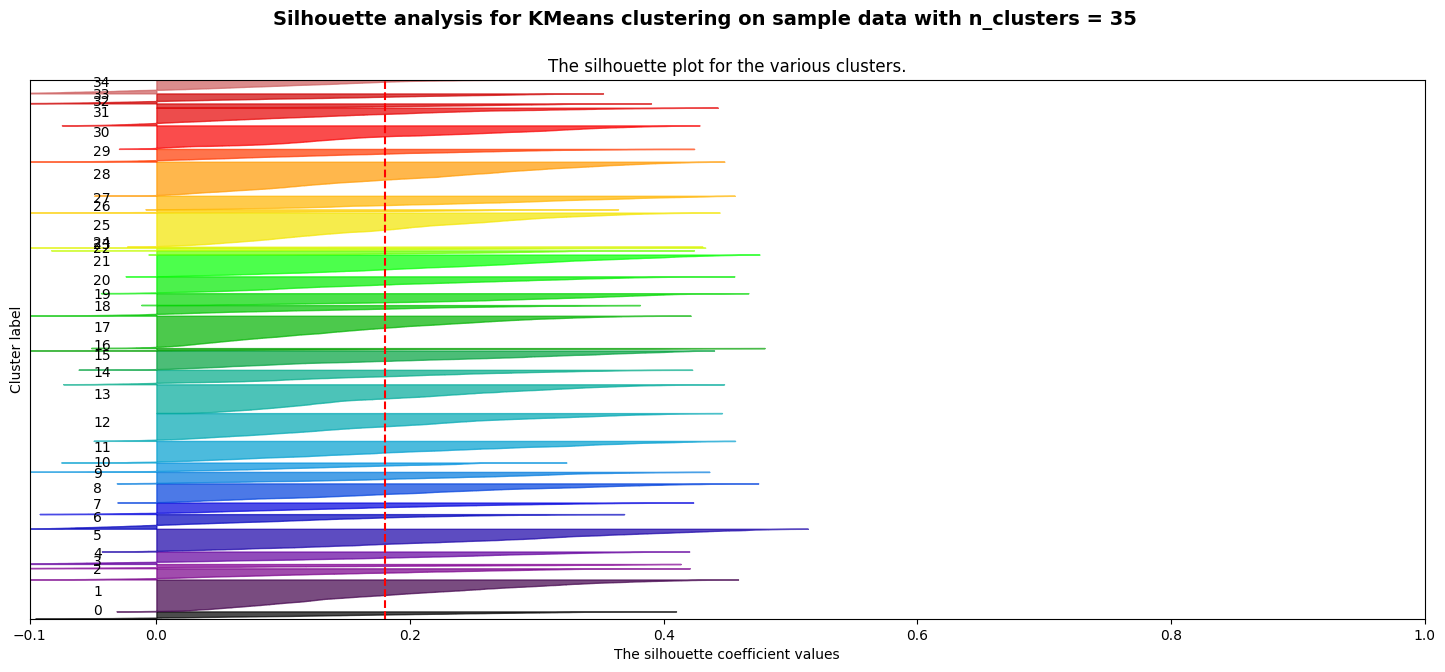

In [145]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(tempdata) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(tempdata)

    kmeans_models.append(clusterer)   
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tempdata, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tempdata, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Liten skilland mellan prototype och normal kmeans

hdbscan gav 0.27 sil score, kollar SHAP (SHapley Additive exPlanations)

In [4]:
tempdata = data.sample(frac=0.4, random_state=42)
#hela datasetet

In [5]:
hdb = HDBSCAN(min_cluster_size=5, n_jobs=-1)
labels = hdb.fit_predict(tempdata)

In [6]:
labels

array([66, 43, 66, ..., 66, 66, 64])

In [7]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [9]:
n_clusters_

68

In [8]:
def sil_Score(n_clusters,data,labels):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(data, labels)
    print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, labels)

    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

For n_clusters = 68 The average silhouette_score is : -0.12829880464935178


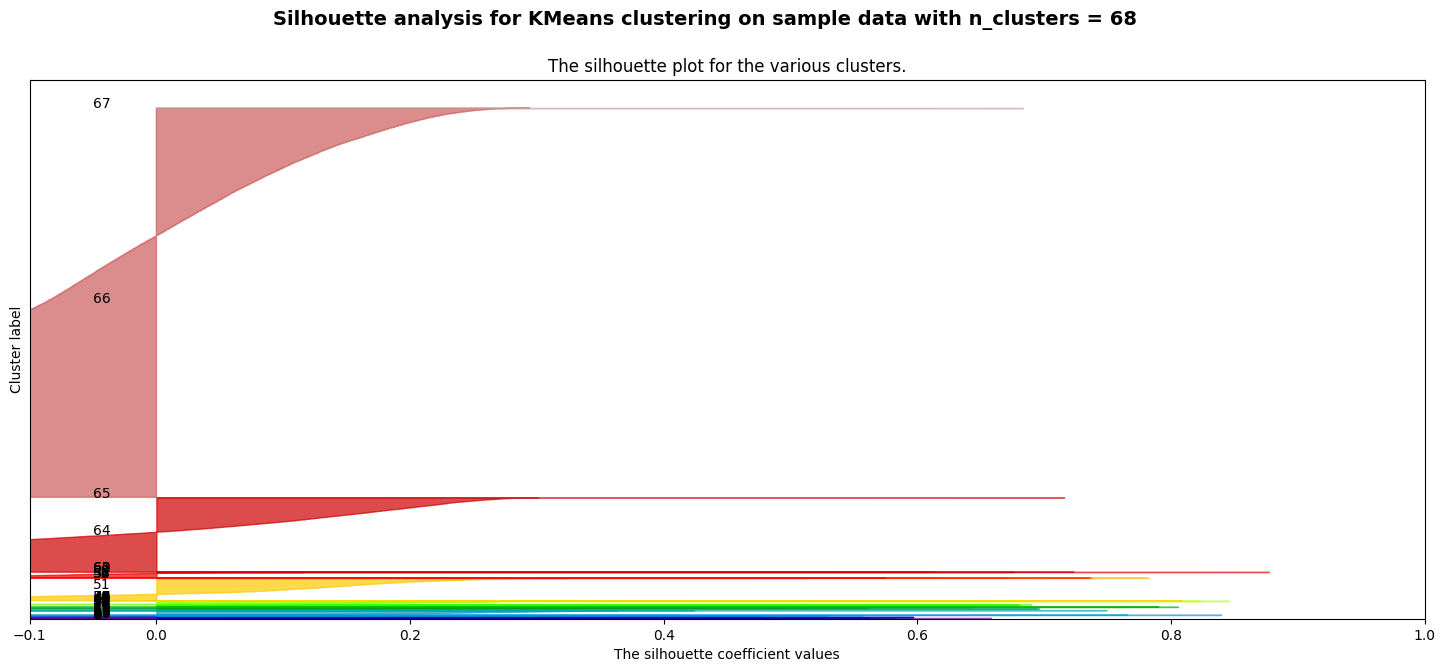

In [10]:
sil_Score(n_clusters_,tempdata,labels)

genom att använda 40% av datasetet så får vi ett negativt sillhuett score, vilket betyder att många datapunkter tränger över till andra kluster

skillnaden från att använda hela datasetet jämnfört med 40% är extremt stort. vi fortsätter med den första hdbscan modellen.

In [6]:
hdb_loaded = joblib.load("hdb_model.pkl")

In [61]:
labels = hdb_loaded.labels_


In [62]:
labels

array([48, 48, 48, ..., 48, 48, 48])

In [10]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

#om en datapunkt är i cluster -1 så anser hdbscan att dem datapunkterna är noise och skall inte tillhöra något kluster

Estimated number of clusters: 52
Estimated number of noise points: 2178


In [11]:
len(labels)

308854

In [12]:
pd.set_option('display.max_columns', 500)

In [53]:
tempdata = data.sample(frac=1, random_state=42)#important use randomstate=42
clustered_data = pd.DataFrame(data)
clustered_data["Cluster"] = labels

In [54]:
clustered_data.to_csv("clustered_data.csv",index=False)

Read in saved clustered_data

In [13]:
clustered_data = pd.read_csv("clustered_data.csv")

In [14]:
clustered_data

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,48
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,48
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,48
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,False,False,True,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,48
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,168.0,81.65,29.05,4.0,30.0,8.0,0.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,48
308850,180.0,69.85,21.48,8.0,15.0,60.0,4.0,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,48
308851,157.0,61.23,24.69,4.0,40.0,8.0,4.0,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,48
308852,183.0,79.38,23.73,3.0,30.0,12.0,0.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,48


In [15]:
clustered_data["Cluster"].value_counts()

Cluster
 48    301591
 41      2542
-1       2178
 50       650
 37       293
 27       225
 46       209
 34       173
 10       103
 28       103
 43       102
 24        61
 20        51
 16        51
 21        39
 26        34
 12        30
 45        30
 40        28
 18        23
 9         21
 5         19
 23        19
 11        18
 36        18
 1         17
 51        15
 3         14
 49        14
 29        13
 47        13
 19        12
 39        12
 15        11
 4         10
 7         10
 38         9
 0          7
 44         7
 31         7
 32         7
 42         6
 33         6
 14         6
 30         6
 17         6
 25         5
 6          5
 2          5
 35         5
 22         5
 8          5
 13         5
Name: count, dtype: int64

In [16]:
clustered_data.groupby("Cluster").describe()

Height_(cm)                                                       \
              count        mean        std    min     25%    50%     75%   
Cluster                                                                    
-1           2178.0  171.033517  10.539480  119.0  163.00  170.0  178.00   
 0              7.0  167.857143   9.317163  152.0  164.00  170.0  172.50   
 1             17.0  164.470588   9.611956  152.0  157.00  163.0  173.00   
 2              5.0  167.000000  10.099505  152.0  165.00  168.0  170.00   
 3             14.0  171.142857   8.882629  152.0  168.00  173.0  177.25   
 4             10.0  169.900000  10.071412  152.0  165.00  170.0  172.25   
 5             19.0  169.368421  12.410616  145.0  161.50  168.0  180.50   
 6              5.0  167.000000  10.931606  155.0  157.00  168.0  175.00   
 7             10.0  172.800000   8.066391  163.0  168.00  169.0  178.00   
 8              5.0  173.800000   9.549869  160.0  168.00  178.0  180.00   
 9             21.0  167.238095  18.250766  100.0  163.00  170.0  180.00   
 10           103.0  170.990291   9.848355  152.0  163.00  173.0  178.00   
 11            18.0  171.222222   9.896854  152.0  165.75  173.0  180.00   
 12            30.0  169.566667   9.964362  155.0  163.00  168.0  178.75   
 13             5.0  167.600000  11.081516  157.0  157.00  168.0  173.00   
 14             6.0  171.666667   9.831921  160.0  164.25  170.5  180.50   
 15            11.0  164.181818   8.919845  150.0  157.50  165.0  170.00   
 16            51.0  171.725490   9.921852  155.0  163.00  173.0  178.00   
 17             6.0  167.166667  18.594802  150.0  154.00  160.0  181.00   
 18            23.0  172.217391  13.135505  152.0  160.00  173.0  183.00   
 19            12.0  170.666667  15.482150  132.0  162.25  178.0  180.75   
 20            51.0  170.137255  11.385991  147.0  163.00  170.0  178.00   
 21            39.0  170.743590  11.917961  147.0  160.00  170.0  178.00   
 22             5.0  169.600000   8.532292  157.0  165.00  173.0  175.00   
 23            19.0  170.315789  10.419280  150.0  163.00  173.0  176.50   
 24            61.0  172.344262  11.640282  147.0  163.00  173.0  180.00   
 25             5.0  170.200000  13.442470  150.0  165.00  173.0  178.00   
 26            34.0  169.558824  11.714252  152.0  163.00  168.0  175.00   
 27           225.0  170.102222  10.505664  140.0  163.00  170.0  178.00   
 28           103.0  173.009709  11.356518  152.0  163.00  173.0  180.00   
 29            13.0  167.538462  10.564211  152.0  163.00  170.0  175.00   
 30             6.0  163.833333   9.368387  152.0  157.50  165.0  167.25   
 31             7.0  159.571429  27.403510  103.0  156.00  163.0  178.00   
 32             7.0  179.714286  11.190983  160.0  175.50  183.0  184.00   
 33             6.0  168.000000   7.848567  157.0  163.50  167.5  173.75   
 34           173.0  170.410405   9.928190  145.0  163.00  170.0  178.00   
 35             5.0  173.800000   4.324350  168.0  173.00  173.0  175.00   
 36            18.0  172.111111   8.683242  152.0  165.75  173.0  178.00   
 37           293.0  171.317406  11.045281  147.0  163.00  170.0  180.00   
 38             9.0  171.333333  11.335784  157.0  163.00  165.0  183.00   
 39            12.0  171.916667  13.207837  150.0  163.00  171.5  183.00   
 40            28.0  173.035714   9.799781  152.0  164.50  173.0  180.00   
 41          2542.0  170.784028  10.670450  130.0  163.00  170.0  178.00   
 42             6.0  179.000000   7.155418  168.0  175.75  179.0  183.75   
 43           102.0  171.598039  10.355330  150.0  163.50  171.5  178.00   
 44             7.0  162.571429   6.106203  157.0  158.50  163.0  163.00   
 45            30.0  171.433333  13.639909  150.0  158.50  173.0  182.25   
 46           209.0  169.918660  10.134105  150.0  163.00  170.0  178.00   
 47            13.0  175.153846   8.735427  163.0  168.00  175.0  178.00   
 48        301591.0  170.611325  10.657344   91.0  163.0

In [17]:
clustered_data[clustered_data['Cluster'] == 48].describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster
count,301591.000000,301591.000000,301591.000000,301591.000000,301591.000000,301591.000000,301591.000000,301591.0
mean,170.611325,83.572929,28.622352,5.093318,29.831000,15.113034,6.292734,48.0
std,10.657344,21.332615,6.520186,8.196196,24.868559,14.939511,8.569792,0.0
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000,48.0
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000,48.0
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000,48.0
75%,178.000000,95.250000,31.840000,6.000000,30.000000,20.000000,8.000000,48.0
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000,48.0


In [18]:
clustered_data[clustered_data['Cluster'] == 48].info()

<class 'pandas.core.frame.DataFrame'>
Index: 301591 entries, 0 to 308853
Data columns (total 39 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Height_(cm)                                          301591 non-null  float64
 1   Weight_(kg)                                          301591 non-null  float64
 2   BMI                                                  301591 non-null  float64
 3   Alcohol_Consumption                                  301591 non-null  float64
 4   Fruit_Consumption                                    301591 non-null  float64
 5   Green_Vegetables_Consumption                         301591 non-null  float64
 6   FriedPotato_Consumption                              301591 non-null  float64
 7   General_Health_Fair                                  301591 non-null  bool   
 8   General_Health_Good                                  301591

In [19]:
clustered_data[clustered_data['Cluster'] == 48].describe(include="bool")

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,266624,208478,290537,193799,288498,265284,284578,233807,233799,277192,272282,272418,241156,294862,262334,299002,202916,156459,286464,283602,281496,280502,281109,277071,274179,269931,268965,271162,281396,279826,179324


In [20]:
1-(179324/301591)

0.405406660013064

In [21]:
1-(202916/301591)

0.3271815140372226

notera när alla general health är = false så är det samma som general health excelent = True
- vi kan notera att freq minskar ju bättre hälsan är ända tills vi når exelent vilket betyder att detta klusteret har väldigt friska människor i sig
- det är nog därför detta klusteret är så stort då majoriteten är friska i datasetet
- datan säger också att en stor majoritet tränar och har gjort en checkup inom ett år.
- notera att vi också har ca hälften män och kvinnor vilket är bra då modellen inte separerar friska patienter beroende på kön
- notera att alla age groups är i majoritetet false vilket betyder att detta klustret består i störts del av 19-24 åringar, vilket ofta är hälsosamma
- nästan hälften (41%) av dem röker dock vilket kan betyda att rökning inte ses som ohälsosamt hos modellen, vilket det kan vara då rökning ofta har en längre negativ påverkan
- ca 33% har dock arthritis


In [22]:
clustered_data[clustered_data['Cluster'] == 41].describe(include="bool")

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,2253,1767,2430,1625,2423,2221,2393,1941,1949,2356,2303,2296,2038,2475,2219,2521,1725,1279,2415,2396,2359,2358,2373,2358,2311,2270,2251,2295,2377,2373,1480


In [23]:
#continuous_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI']  # Add more continuous columns as needed
correlations = clustered_data.drop("Cluster", axis=1).corrwith(clustered_data['Cluster']==48)
# Display correlations
print(correlations)

Height_(cm)                                           -0.002373
Weight_(kg)                                           -0.004748
BMI                                                   -0.003812
Alcohol_Consumption                                   -0.002395
Fruit_Consumption                                     -0.001088
Green_Vegetables_Consumption                           0.001120
FriedPotato_Consumption                               -0.002914
General_Health_Fair                                   -0.000060
General_Health_Good                                   -0.000390
General_Health_Poor                                   -0.001198
General_Health_Very Good                              -0.000310
Checkup_5 or more years ago                           -0.001299
Checkup_Within the past 2 years                       -0.002028
Checkup_Within the past 5 years                       -0.001743
Checkup_Within the past year                           0.003328
Exercise_Yes                            

In [24]:
spearman_corr = clustered_data.drop("Cluster", axis=1).corrwith(clustered_data['Cluster']==2, method='spearman')
print(spearman_corr)

Height_(cm)                                           -0.001197
Weight_(kg)                                           -0.000582
BMI                                                   -0.000366
Alcohol_Consumption                                    0.000031
Fruit_Consumption                                      0.000305
Green_Vegetables_Consumption                           0.000611
FriedPotato_Consumption                                0.002628
General_Health_Fair                                   -0.001457
General_Health_Good                                    0.000795
General_Health_Poor                                   -0.000785
General_Health_Very Good                               0.000357
Checkup_5 or more years ago                           -0.000858
Checkup_Within the past 2 years                       -0.001489
Checkup_Within the past 5 years                       -0.000984
Checkup_Within the past year                           0.002168
Exercise_Yes                            

In [17]:
colors = px.colors.sequential.Magma

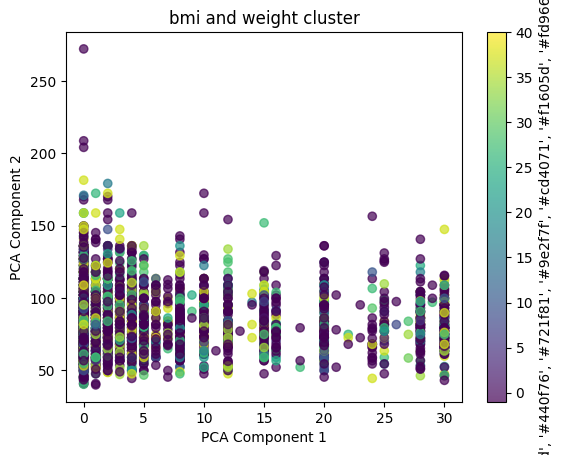

In [26]:
# 1. Visualize the clusters in the 2D PCA space
plt.scatter(clustered_data.loc[clustered_data["Cluster"] < 41, "Alcohol_Consumption"], clustered_data.loc[clustered_data["Cluster"] < 41, "Weight_(kg)"], c=clustered_data.loc[clustered_data["Cluster"] < 41, "Cluster"], cmap='viridis', alpha=0.7)
plt.title("bmi and weight cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label=colors)
plt.show()

In [91]:
clustered_data.loc[clustered_data["Cluster"] == 41, "BMI"]

5         46.11
67        24.45
135       23.73
181       20.36
253       18.29
          ...  
307997    29.18
308441    39.16
308501    31.32
308603    28.06
308736    27.98
Name: BMI, Length: 2542, dtype: float64

In [97]:

clustered_data.loc[clustered_data["Cluster"] == 41, "Cluster"]

5         41
67        41
135       41
181       41
253       41
          ..
307997    41
308441    41
308501    41
308603    41
308736    41
Name: Cluster, Length: 2542, dtype: int64

In [79]:
categorical_columns = data.select_dtypes(include=['bool']).columns.tolist()
numerical_columns = clustered_data.drop(categorical_columns, axis=1).columns.tolist()

In [128]:
numerical_columns[:-1]
#categorical_columns

['Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption']

In [126]:
# Select features and labels
X_continuous = clustered_data[numerical_columns[:-1]]  # Add more continuous features
y = clustered_data['Cluster']  # Cluster labels

# Perform ANOVA F-test
f_values, p_values = f_classif(X_continuous, y)

# Display F-values and p-values
for feature, f_val, p_val in zip(X_continuous.columns, f_values, p_values):
    print(f"Feature: {feature}, F-value: {f_val}, P-value: {p_val}")

Feature: Height_(cm), F-value: 1.2633843843767651, P-value: 0.09604735584977367
Feature: Weight_(kg), F-value: 1.1626259479550667, P-value: 0.19693609436524165
Feature: BMI, F-value: 1.2395117129546651, P-value: 0.11515443239066607
Feature: Alcohol_Consumption, F-value: 1.138379177750385, P-value: 0.22962521031941957
Feature: Fruit_Consumption, F-value: 0.8963517456694953, P-value: 0.6850667844595952
Feature: Green_Vegetables_Consumption, F-value: 0.9114667517929298, P-value: 0.6552531596775355
Feature: FriedPotato_Consumption, F-value: 1.261905874469584, P-value: 0.09715192545868799


In [137]:
clustered_data.loc[clustered_data["Cluster"] == 41, "Cluster"]

5         41
67        41
135       41
181       41
253       41
          ..
307997    41
308441    41
308501    41
308603    41
308736    41
Name: Cluster, Length: 2542, dtype: int64

In [142]:
df = clustered_data.copy()

In [160]:
temp = sorted(clustered_data["Cluster"].unique().tolist())
temp

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

In [145]:
specific_cluster = 41

df['Is_In_Specific_Cluster'] = (df['Cluster'] == specific_cluster).astype(int)

results = []

for feature in categorical_columns:
    # Create a contingency table between the feature and the specific cluster membership
    contingency_table = pd.crosstab(df[feature], df['Is_In_Specific_Cluster'])
    
    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the result for this feature
    results.append({'Feature': feature, 'Chi-Square': chi2, 'P-value': p})

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                                              Feature  Chi-Square   P-value
0                                 General_Health_Fair    0.105912  0.744847
1                                 General_Health_Good    0.163739  0.685737
2                                 General_Health_Poor    3.734485  0.053300
3                            General_Health_Very Good    0.107842  0.742615
4                         Checkup_5 or more years ago    0.616778  0.432247
5                     Checkup_Within the past 2 years    0.757007  0.384267
6                     Checkup_Within the past 5 years    0.182026  0.669638
7                        Checkup_Within the past year    1.864105  0.172152
8                                        Exercise_Yes    0.975606  0.323286
9                                   Heart_Disease_Yes    1.931327  0.164613
10                                    Skin_Cancer_Yes    0.245277  0.620421
11                                   Other_Cancer_Yes    0.000000  1.000000
12          

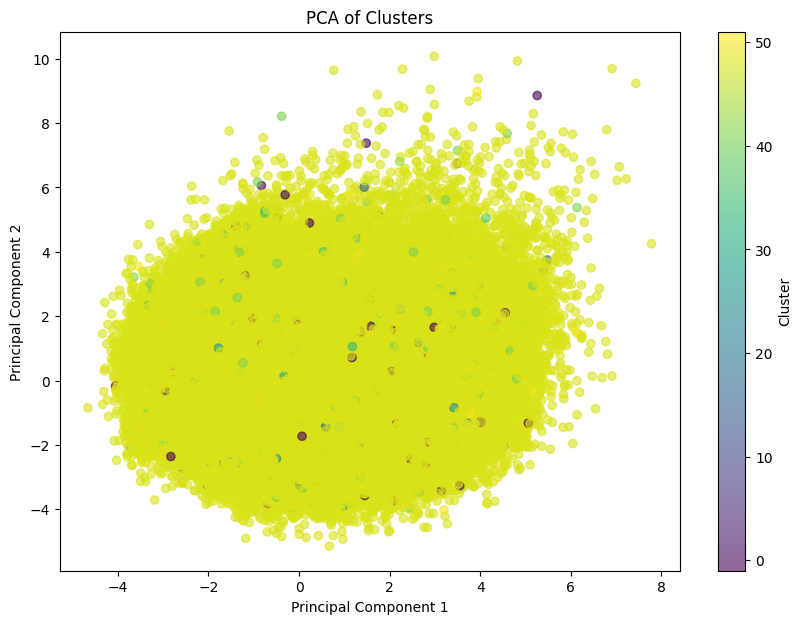

In [40]:
# Assuming `df` is your DataFrame, with a 'Cluster' column representing cluster assignments.

# Step 1: Separate features and cluster labels
features = clustered_data.drop(columns=['Cluster'])
clusters = clustered_data['Cluster']

# Step 2: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Apply PCA to reduce to 2 components for 2D visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Step 4: Plot the PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clusters')
plt.show()

In [54]:
def plot_3d_pca(highlight_label,specifik_cluster = None):
    
    highlight_cluster = highlight_label  # Specify the cluster you want to highlight
    
    if specifik_cluster == None:
        features = clustered_data.drop(columns=['Cluster'])
        clusters = clustered_data['Cluster']
        highlight_color = 'green'  # Color for the highlighted cluster
        neutral_color = 'grey'  # Color for all other clusters
        colors = [highlight_color if cluster == highlight_cluster else neutral_color for cluster in clusters]
        
    else:
        df_cluster = clustered_data[clustered_data['Cluster'] == specifik_cluster]
        features = df_cluster.drop(columns=['Cluster'])
        colors='red'
    

    # Step 2: Standardize the data
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Step 3: Apply PCA to reduce to 3 components for 3D visualization
    pca = PCA(n_components=3)
    features_pca = pca.fit_transform(features_scaled)

    # Create a color list based on the clusters

    # Step 4: Plot the PCA results in 3D with custom colors
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], 
                        c=colors, alpha=0.6)

    # Adding labels and title
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.title(f'3D PCA of Clusters with Cluster {highlight_cluster} Highlighted')
    plt.show()

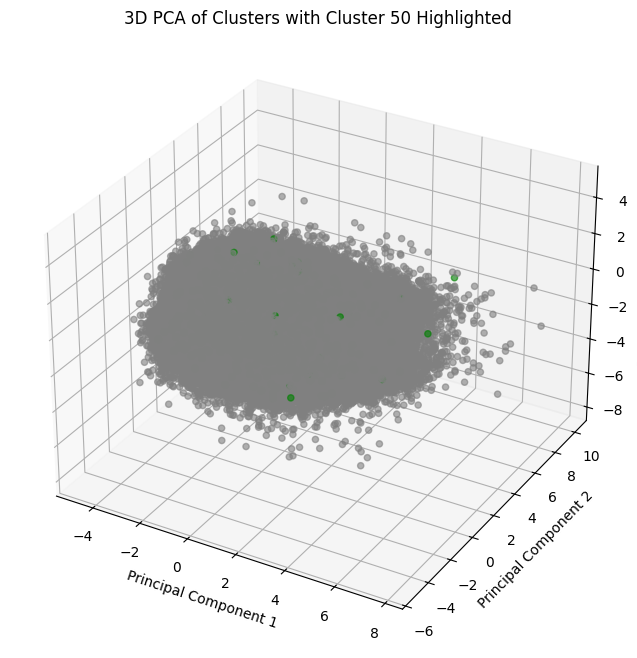

In [58]:
plot_3d_pca(highlight_label = 50,specifik_cluster = None)

In [65]:
clustered_data["Cluster"].value_counts()

Cluster
 48    301591
 41      2542
-1       2178
 50       650
 37       293
 27       225
 46       209
 34       173
 10       103
 28       103
 43       102
 24        61
 20        51
 16        51
 21        39
 26        34
 12        30
 45        30
 40        28
 18        23
 9         21
 5         19
 23        19
 11        18
 36        18
 1         17
 51        15
 3         14
 49        14
 29        13
 47        13
 19        12
 39        12
 15        11
 4         10
 7         10
 38         9
 0          7
 44         7
 31         7
 32         7
 42         6
 33         6
 14         6
 30         6
 17         6
 25         5
 6          5
 2          5
 35         5
 22         5
 8          5
 13         5
Name: count, dtype: int64

https://en.wikipedia.org/wiki/Chi-squared_test

https://en.wikipedia.org/wiki/Contingency_table

In [94]:
categorical_features = clustered_data.select_dtypes(include=['bool']).columns.tolist()
numerical_features = clustered_data.drop(categorical_columns, axis=1).columns.tolist()

In [95]:
print(len(categorical_features))
print(len(numerical_features))

31
8


In [99]:
results = []

# Chi-Square Test for Categorical Features
for feature in categorical_features:
    contingency_table = pd.crosstab(clustered_data[feature], clustered_data['Cluster'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results.append({'Feature': feature, 'Test': 'Chi-Square', 'Chi-Square': chi2, 'P-value': p})

# ANOVA for Numerical Features
for feature in numerical_features:
    f_stat, p = f_oneway(*[group[feature].values for name, group in clustered_data.groupby('Cluster')])
    results.append({'Feature': feature, 'Test': 'ANOVA', 'F-Statistic': f_stat, 'P-value': p})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save results to CSV
results_df.to_csv("anova_chi_square_results.csv", index=False)

# Display results
print(results_df)

                                              Feature        Test  Chi-Square  \
0                                 General_Health_Fair  Chi-Square   51.099861   
1                                 General_Health_Good  Chi-Square   48.153252   
2                                 General_Health_Poor  Chi-Square   63.264398   
3                            General_Health_Very Good  Chi-Square   48.745984   
4                         Checkup_5 or more years ago  Chi-Square   46.466237   
5                     Checkup_Within the past 2 years  Chi-Square   49.787397   
6                     Checkup_Within the past 5 years  Chi-Square   56.976684   
7                        Checkup_Within the past year  Chi-Square   56.178973   
8                                        Exercise_Yes  Chi-Square   36.334420   
9                                   Heart_Disease_Yes  Chi-Square   52.559878   
10                                    Skin_Cancer_Yes  Chi-Square   42.892944   
11                          

c:\Users\serig\OneDrive\vikrigt\skola\ds23_projektkurs-main\git\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [113]:

# Assuming df is your DataFrame and has a 'Cluster' column indicating cluster assignments

# Initialize an empty dictionary to store results
significant_features = {}

# Loop over each unique cluster
for cluster in clustered_data['Cluster'].unique():
    # Filter the data for the current cluster
    df_cluster = clustered_data[clustered_data['Cluster'] == cluster]
    
    # Initialize a list to store significant features for this cluster
    significant_features[cluster] = []
    
    # Loop over each feature (excluding the 'Cluster' column)
    for feature in clustered_data.drop(columns=['Cluster']).columns:
        if clustered_data[feature].dtype == 'object' or clustered_data[feature].nunique() < 10:  # Categorical features
            # Create a contingency table for the feature and cluster assignment
            contingency_table = pd.crosstab(clustered_data[feature], clustered_data['Cluster'] == cluster)
            
            # Perform the Chi-square test
            chi2, p, _, _ = chi2_contingency(contingency_table)
            
            # Check if the p-value is below 0.10
            test_type = "Chi-Squared"
            if p < 0.10:
                significant_features[cluster].append((feature, chi2, p, test_type))
        
        else:  # Numerical features
            # Perform ANOVA test for numerical features against cluster
            f_stat, p = f_oneway(*[group[feature].values for name, group in clustered_data.groupby('Cluster')])
            
            test_type = "ANOVA, F-test"
            
            # Check if the p-value is below 0.10
            if p < 0.10:
                significant_features[cluster].append((feature, f_stat, p, test_type))




In [114]:
# Convert results to a DataFrame for easier viewing
significant_df = pd.DataFrame([
    {"Cluster": cluster, "Feature": feature, "Statistic": stat, "P-value": p, "Test type": test_type}
    for cluster, features in significant_features.items() for feature, stat, p, test_type in features
])

# Display the results
print(significant_df)

# Optional: Save the results to a CSV file
significant_df.to_csv("significant_features_results.csv", index=False)

     Cluster                          Feature  Statistic   P-value  \
0         48                      Height_(cm)   1.263384  0.096047   
1         48          FriedPotato_Consumption   1.261906  0.097152   
2         48     Checkup_Within the past year   3.368491  0.066455   
3         48               Age_Category_70-74   5.043738  0.024715   
4         41                      Height_(cm)   1.263384  0.096047   
..       ...                              ...        ...       ...   
169        0          FriedPotato_Consumption   1.261906  0.097152   
170        0  Checkup_Within the past 2 years   3.699624  0.054425   
171        0               Age_Category_60-64   4.738676  0.029492   
172       17                      Height_(cm)   1.263384  0.096047   
173       17          FriedPotato_Consumption   1.261906  0.097152   

         Test type  
0    ANOVA, F-test  
1    ANOVA, F-test  
2      Chi-Squared  
3      Chi-Squared  
4    ANOVA, F-test  
..             ...  
169  ANOVA, 

In [3]:
significant_df = pd.read_csv("significant_features_results.csv")

In [10]:
clustered_data = pd.read_csv("clustered_data.csv")
pd.set_option('display.max_columns', 500)

In [4]:
grouped_significant_df = significant_df.groupby("Cluster")
for cluster, data in grouped_significant_df:
    print(f"Cluster {cluster} - Significant Features (p < 0.10):")
    print(data[["Feature", "Statistic", "P-value", "Test type"]])
    print("\n" + "="*50 + "\n")

Cluster -1 - Significant Features (p < 0.10):
                    Feature  Statistic   P-value      Test type
22              Height_(cm)   1.263384  0.096047  ANOVA, F-test
23  FriedPotato_Consumption   1.261906  0.097152  ANOVA, F-test
24       Age_Category_60-64   3.102810  0.078157    Chi-Squared
25       Age_Category_70-74   3.676637  0.055180    Chi-Squared
26       Age_Category_75-79   2.808627  0.093759    Chi-Squared


Cluster 0 - Significant Features (p < 0.10):
                             Feature  Statistic   P-value      Test type
168                      Height_(cm)   1.263384  0.096047  ANOVA, F-test
169          FriedPotato_Consumption   1.261906  0.097152  ANOVA, F-test
170  Checkup_Within the past 2 years   3.699624  0.054425    Chi-Squared
171               Age_Category_60-64   4.738676  0.029492    Chi-Squared


Cluster 1 - Significant Features (p < 0.10):
                    Feature  Statistic   P-value      Test type
96              Height_(cm)   1.263384  0.09604

In [13]:
clustered_data[clustered_data["Cluster"] == 16]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster
2529,170.0,72.57,25.06,0.0,60.0,60.0,2.0,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,16
10720,163.0,81.65,30.90,2.0,90.0,5.0,30.0,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,16
15975,157.0,78.93,31.82,0.0,30.0,4.0,4.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,16
25897,173.0,99.79,33.45,0.0,5.0,6.0,15.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,16
35636,173.0,68.95,23.11,0.0,1.0,0.0,1.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,16
40274,191.0,81.65,22.50,12.0,16.0,30.0,4.0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,16
40612,178.0,79.38,25.11,20.0,20.0,15.0,10.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,16
44060,175.0,77.11,25.10,4.0,40.0,8.0,8.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,16
44991,175.0,95.25,31.01,20.0,8.0,4.0,12.0,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,16
56543,170.0,81.65,28.19,12.0,12.0,12.0,2.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,16


In [14]:
clustered_data[clustered_data["Cluster"] == 16].describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,171.725490,85.124314,28.838431,5.431373,32.333333,14.431373,5.549020,16.0
std,9.921852,22.163178,6.810277,8.333678,24.743215,12.221710,7.200871,0.0
min,155.000000,55.340000,19.310000,0.000000,0.000000,0.000000,0.000000,16.0
25%,163.000000,71.440000,23.600000,0.000000,12.000000,5.500000,1.000000,16.0
50%,173.000000,81.650000,27.370000,2.000000,30.000000,12.000000,4.000000,16.0
75%,178.000000,96.160000,33.030000,10.000000,60.000000,25.000000,8.000000,16.0
max,193.000000,179.170000,53.570000,30.000000,90.000000,60.000000,30.000000,16.0


In [15]:
clustered_data[clustered_data["Cluster"] == 16].describe(include="bool")

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
unique,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,44,34,51,33,47,42,48,35,42,47,46,49,44,51,43,48,37,27,49,48,48,44,48,47,46,49,46,45,46,49,28


In [20]:
def plot_2d(feature_1,feature_2,cluster_nr):
    plt.scatter(clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_1], clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_2], c=clustered_data.loc[clustered_data["Cluster"] == cluster_nr, "Cluster"], cmap='viridis', alpha=0.7)
    plt.title("bmi and weight cluster")
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.colorbar(label=colors)
    plt.show()